# Question 1 
Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. Occupations<br />
Step 1. Import the necessary libraries<br />
Step 2. Import the dataset from this address.<br />
Step 3. Assign it to a variable called users <br />
Step 4. Discover what is the mean age per occupation<br />
Step 5. Discover the Male ratio per occupation and sort it from the most to the least<br />
Step 6. For each occupation, calculate the minimum and maximum ages<br />
Step 7. For each combination of occupation and sex, calculate the mean age<br />
Step 8. For each occupation present the percentage of women and men<br />

In [1]:
import pandas
import numpy

In [2]:
users = pandas.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

In [3]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
users[['occupation','age']].groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [5]:
users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)

In [6]:
print(users.groupby('occupation').age.min())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64


In [9]:
print(users.groupby('occupation').age.max())

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [8]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
Gender_count=users.groupby(['occupation','gender'])['gender'].count()
Total_count=users.groupby(['occupation'])['gender'].count()
ratio=((Gender_count/Total_count)*100).round(1)
ratio.sort_values(ascending=False).xs('M',level=1)  

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: gender, dtype: float64

In [11]:
Gender_count1 = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
Total_count1= users.groupby(['occupation']).agg('count')
final=((Gender_count1/Total_count1) * 100).round(1)
final.loc[: , 'gender']

occupation     gender
administrator  F          45.6
               M          54.4
artist         F          46.4
               M          53.6
doctor         M         100.0
educator       F          27.4
               M          72.6
engineer       F           3.0
               M          97.0
entertainment  F          11.1
               M          88.9
executive      F           9.4
               M          90.6
healthcare     F          68.8
               M          31.2
homemaker      F          85.7
               M          14.3
lawyer         F          16.7
               M          83.3
librarian      F          56.9
               M          43.1
marketing      F          38.5
               M          61.5
none           F          44.4
               M          55.6
other          F          34.3
               M          65.7
programmer     F           9.1
               M          90.9
retired        F           7.1
               M          92.9
salesman       F 

# Question 2
Euro Teams<br />
Step 1. Import the necessary libraries<br />
Step 2. Import the dataset from this address<br />
Step 3. Assign it to a variable called euro12<br />
Step 4. Select only the Goal column<br />
Step 5. How many team participated in the Euro2012?<br />
Step 6. What is the number of columns in the dataset?<br />
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline<br />
Step 8. Sort the teams by Red Cards, then to Yellow Cards<br />
Step 9. Calculate the mean Yellow Cards given per Team<br />
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G<br />
Step 12. Select the first 7 columns<br />
Step 13. Select all columns except the last 3<br />
Step 14. Present only the Shooting Accuracy from England, Italy and Russi<br />

In [12]:
import pandas

In [13]:
euro12 = pandas.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [14]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [15]:
euro12['Team'].nunique()

16

In [16]:
len(euro12.columns)

35

In [17]:
discipline=euro12[['Team','Red Cards','Yellow Cards']]
discipline

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


In [18]:
sort=discipline.sort_values(by=['Red Cards','Yellow Cards'])
sort

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [19]:
discipline2=euro12[['Team','Yellow Cards']]
discipline2.groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [20]:
Morethan_6=euro12[euro12.Goals>6]
Morethan_6

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [21]:
TeamG=euro12.loc[euro12['Team'].str.startswith('G')].copy()
TeamG

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [22]:
euro12.iloc[:, 0:8]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork
0,Croatia,4,13,12,51.9%,16.0%,32,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0
2,Denmark,4,10,10,50.0%,20.0%,27,1
3,England,5,11,18,50.0%,17.2%,40,0
4,France,3,22,24,37.9%,6.5%,65,1
5,Germany,10,32,32,47.8%,15.6%,80,2
6,Greece,5,8,18,30.7%,19.2%,32,1
7,Italy,6,34,45,43.0%,7.5%,110,2
8,Netherlands,2,12,36,25.0%,4.1%,60,2
9,Poland,2,15,23,39.4%,5.2%,48,0


In [23]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [24]:
rows=['England','Italy','Russia']
euro12[euro12.Team.isin(rows)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16


# Question 3

In [25]:
import random

In [26]:
a1 = pandas.Series(numpy.random.randint(1,5,100))
a2 = pandas.Series(numpy.random.randint(1,4,100))
a3 = pandas.Series(numpy.random.randint(10000, 30000, 100 ))

In [27]:
a = pandas.concat([a1,a2,a3],axis=1)
a.head()

,0,1,2
0,4,3,24480
1,2,2,18184
2,2,1,12981
3,3,1,23959
4,4,2,19504


In [28]:
a.columns = ['bedrs','bathrs','price_sqr_meter']

In [29]:
a

,bedrs,bathrs,price_sqr_meter
0,4,3,24480
1,2,2,18184
2,2,1,12981
3,3,1,23959
4,4,2,19504
...,...,...,...
95,4,1,23875
96,4,1,22523
97,1,3,17846
98,3,3,16255


In [30]:
bigcolumn = pandas.concat([a1,a2,a3],axis=0)

In [31]:
bigcolumn

0         4
1         2
2         2
3         3
4         4
      ...  
95    23875
96    22523
97    17846
98    16255
99    29689
Length: 300, dtype: int32

# Question 4

In [32]:
wind = pandas.read_csv('wind.txt',sep = '\s+')

In [33]:
wind = pandas.read_csv('wind.txt',sep = '\s+')
wind["Date"] = pandas.to_datetime(wind[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
wind = wind.drop(columns=["Yr","Mo","Dy"])

In [34]:
wind.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [35]:
wind["Date"] = numpy.where(pandas.DatetimeIndex(wind["Date"]).year < 2000,wind.Date,wind.Date - pandas.offsets.DateOffset(years=100))

In [36]:
newwind = wind.set_index("Date")
newwind.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [37]:
newwind.isnull().values.ravel().sum()

31

In [38]:
a=newwind.count()
print("Non-Missing values:",a.sum())

Non-Missing values: 78857


In [39]:
b=newwind.mean()
print("Mean: ",b.mean())

Mean:  10.227982360836924


In [40]:
def stats(x):
    x = pandas.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pandas.Series(res,index=indx)
    return res
loc_stats = newwind.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [41]:
day_stats = newwind.apply(stats,axis=1)

In [42]:
day_stats.mean()

Min      5.550531
Max     17.530216
Mean    10.228284
Std      3.563680
dtype: float64

In [43]:
print( "Yearly:\n", newwind.resample('y').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [44]:
print ("Monthly:", newwind.resample('m').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

In [45]:
print ("Weekly:", newwind.resample('w').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

# Question 5

In [46]:
chipo = pandas.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [47]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [48]:
chipo.count

<bound method DataFrame.count of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                       

In [49]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [50]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [51]:
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [52]:
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [53]:
chipo['quantity'].count()

4622

In [54]:
chipo.shape[1]

5

In [55]:
x = chipo.groupby('item_name').sum()
x = chipo.sort_values(['quantity'], ascending = False)
x.head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


In [56]:
choice = chipo.groupby('choice_description').sum()
choice = choice.sort_values(['quantity'], ascending = False)
choice.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [57]:
chipo.quantity.sum()

4972

In [58]:
chipo.item_price.dtype

dtype('O')

In [59]:
chipo.item_price.dtype

dtype('O')

In [60]:
chipo.order_id.value_counts().count()

1834

In [61]:
chipo.item_price.sum()

'$2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.

In [62]:
chipo.item_name.value_counts().count()

50

# Question 6

In [63]:
import pandas
import matplotlib

NameError: name 'plt' is not defined

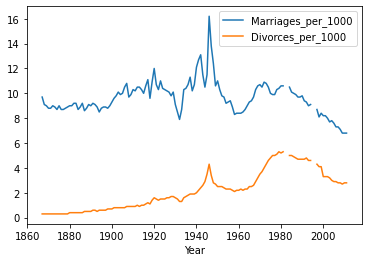

In [64]:
df = pandas.read_csv('us-marriages-divorces-1867-2014.csv')
df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])
plt.title('Marriages and Divorces per capital')
plt.ylabel('Marriages and Divorces per Capita')
plt.xlabel('Year')
plt.show()

# Question 7

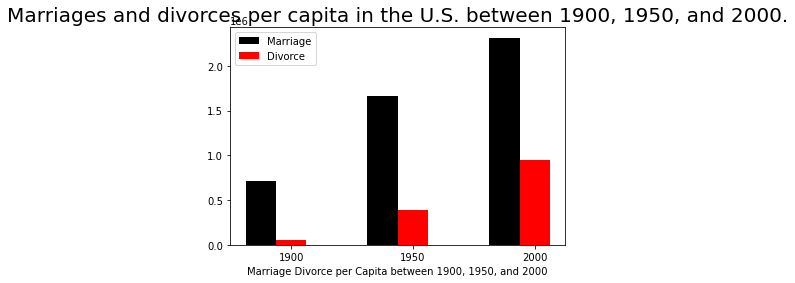

In [65]:
import matplotlib.pyplot as plt
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]
X = numpy.arange(len(marriage))
plt.bar(X, marriage, color = 'black', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'red', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.", fontsize=20)
plt.xlabel('Marriage Divorce per Capita between 1900, 1950, and 2000')
plt.show()

# Question 9

In [66]:
roman_emperors = pandas.read_csv('roman-emperor-reigns.csv')
roman_emperors

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [67]:
plot=roman_emperors.groupby('Cause_of_Death').count()
plot

,Emperor,Length_of_Reign
Cause_of_Death,,
Assassinated,22,22
Died in captivity,1,1
Executed,3,3
Illness,5,5
Killed in battle,8,8
Natural causes,16,16
Possibly assassinated,8,8
Suicide,5,5


<AxesSubplot:ylabel='Emperor'>

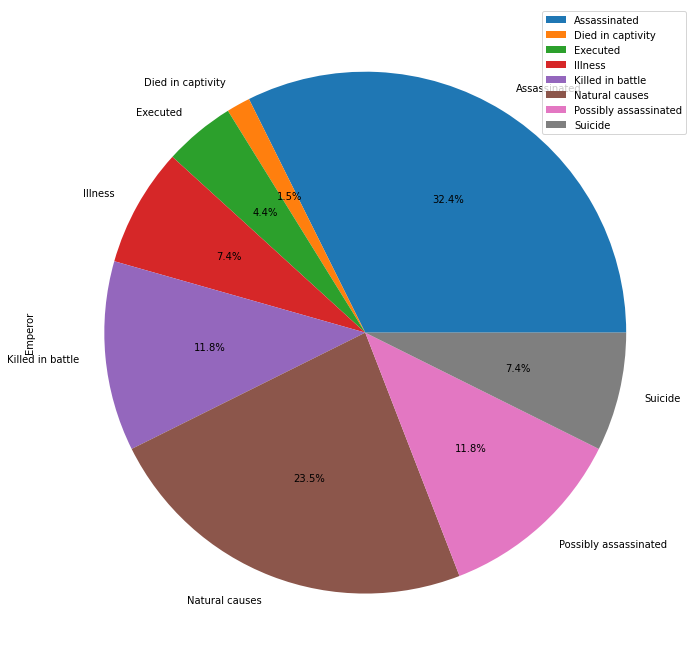

In [68]:
plot.plot.pie(y='Emperor', figsize=(44,12),autopct='%1.1f%%')

# Question 10

In [69]:
Arcade_Data = pandas.read_csv('arcade-revenue-vs-cs-doctorates.csv')
Arcade_Revenue = Arcade_Data['Total Arcade Revenue (billions)'].values
Doctorates_Awarded = Arcade_Data[
    'Computer Science Doctorates Awarded (US)'].values

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

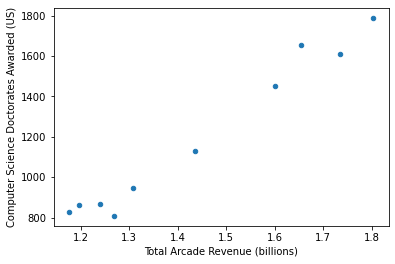

In [70]:
Arcade_Data.plot.scatter(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)')